In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'META',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [56]:
# Create initial dataframe

start = '2022-09-30'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df = df.reset_index(drop=True)

df

[*********************100%***********************]  52 of 52 completed
/tmp/ipykernel_3840520/3730181472.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2022-09-30 00:00:00+00:00,AAPL,136.685547,138.199997,143.100006,138.000000,141.279999,124925300.0
1,2022-10-03 00:00:00+00:00,AAPL,140.888962,142.449997,143.070007,137.690002,138.210007,114311700.0
2,2022-10-04 00:00:00+00:00,AAPL,144.498993,146.100006,146.220001,144.259995,145.029999,87830100.0
3,2022-10-05 00:00:00+00:00,AAPL,144.795685,146.399994,147.380005,143.009995,144.070007,79471000.0
4,2022-10-06 00:00:00+00:00,AAPL,143.836319,145.429993,147.539993,145.220001,145.809998,68402200.0
...,...,...,...,...,...,...,...,...
26098,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0
26099,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0
26100,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0
26101,2024-09-27 00:00:00+00:00,ZM,69.550003,69.550003,69.589996,68.721001,69.010002,1417500.0


In [57]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

for t in [50,100,150]:
    df[f'ret_{t}'] = df.groupby('ticker')['log_ret'].rolling(t,t).sum().reset_index(drop=True)
    df[f'ret_{t}'] = df.groupby('ticker')[f'ret_{t}'].shift(1)

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret,ret_50,ret_100,ret_150
0,2023-05-09 00:00:00+00:00,AAPL,170.429321,171.770004,173.539993,171.600006,173.050003,45326900.0,-0.009971,-0.010021,0.167720,0.184493,0.230659
1,2023-05-10 00:00:00+00:00,AAPL,172.205353,173.559998,174.029999,171.899994,173.020004,53724500.0,0.010421,0.010367,0.149485,0.167712,0.190349
2,2023-05-11 00:00:00+00:00,AAPL,172.393875,173.750000,174.589996,172.169998,173.850006,49514700.0,0.001095,0.001094,0.163306,0.193737,0.175415
3,2023-05-12 00:00:00+00:00,AAPL,171.459900,172.570007,174.059998,171.000000,173.619995,45497800.0,-0.005418,-0.005432,0.178748,0.242819,0.174458
4,2023-05-15 00:00:00+00:00,AAPL,170.963135,172.070007,173.210007,171.470001,173.160004,37266700.0,-0.002897,-0.002901,0.169195,0.252072,0.175673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18246,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0,0.009304,0.009261,0.177883,0.118547,0.101990
18247,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0,-0.021316,-0.021547,0.174288,0.119495,0.124213
18248,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0,0.013981,0.013884,0.138526,0.078339,0.102177
18249,2024-09-27 00:00:00+00:00,ZM,69.550003,69.550003,69.589996,68.721001,69.010002,1417500.0,0.009434,0.009390,0.153425,0.108429,0.103588


In [58]:
pivot = df[['date', 'ticker', 'ret']]
pivot = pivot.pivot(index='date', columns='ticker', values='ret')
pivot = pivot.dropna(axis=1, how='any') # Get rid of stocks that are too young

columns = pivot.columns

scaler = StandardScaler()
scaled_pivot = scaler.fit_transform(pivot)
scaled_pivot = pd.DataFrame(columns=columns, data=scaled_pivot)

mse_matrix = pd.DataFrame(index=columns, columns=columns)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in columns:
    for b in columns:
        mse = compute_mse(scaled_pivot[a], scaled_pivot[b])
        mse_matrix.loc[a, b] = mse

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,1.426857,1.251523,1.724561,1.326269,1.709968,1.582454,1.683208,1.549051,1.720130,...,1.741443,1.209314,1.250153,2.030440,1.500903,1.628625,1.988822,1.873895,2.059043,1.515698
ADBE,1.426857,0.000000,1.307685,1.726082,1.106842,1.900450,1.781181,1.794471,1.678854,1.693657,...,1.691573,1.572059,1.437107,1.981227,1.363721,1.720935,2.119648,1.858062,2.113604,1.376467
AMAT,1.251523,1.307685,0.000000,1.760021,1.140554,1.980995,1.499193,1.710303,1.220024,1.779421,...,1.654080,1.165192,0.726990,2.253201,1.567124,1.800152,2.262355,1.978318,2.074326,1.533536
AMGN,1.724561,1.726082,1.760021,0.000000,1.756111,1.578750,1.851233,1.235108,1.557706,1.511644,...,1.413202,1.794732,1.595443,1.771188,1.654535,1.429159,1.718131,1.675899,1.819827,1.937995
AMZN,1.326269,1.106842,1.140554,1.756111,0.000000,1.923174,1.529708,1.852134,1.509486,1.976666,...,1.739293,1.342009,1.352390,2.168050,1.469055,1.766980,1.966101,1.657504,2.156143,1.488580


In [59]:
corr = pivot.corr()

corr.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.286571,0.374238,0.137720,0.336866,0.145016,0.208773,0.158396,0.225474,0.139935,...,0.129279,0.395343,0.374924,-0.015220,0.249549,0.185687,0.005589,0.063052,-0.029521,0.242151
ADBE,0.286571,1.000000,0.346157,0.136959,0.446579,0.049775,0.109410,0.102765,0.160573,0.153171,...,0.154213,0.213970,0.281447,0.009387,0.318140,0.139532,-0.059824,0.070969,-0.056802,0.311766
AMAT,0.374238,0.346157,1.000000,0.119990,0.429723,0.009502,0.250404,0.144849,0.389988,0.110289,...,0.172960,0.417404,0.636505,-0.126601,0.216438,0.099924,-0.131177,0.010841,-0.037163,0.233232
AMGN,0.137720,0.136959,0.119990,1.000000,0.121944,0.210625,0.074383,0.382446,0.221147,0.244178,...,0.293399,0.102634,0.202278,0.114406,0.172733,0.285420,0.140934,0.162051,0.090087,0.031003
AMZN,0.336866,0.446579,0.429723,0.121944,1.000000,0.038413,0.235146,0.073933,0.245257,0.011667,...,0.130354,0.328995,0.323805,-0.084025,0.265473,0.116510,0.016949,0.171248,-0.078072,0.255710


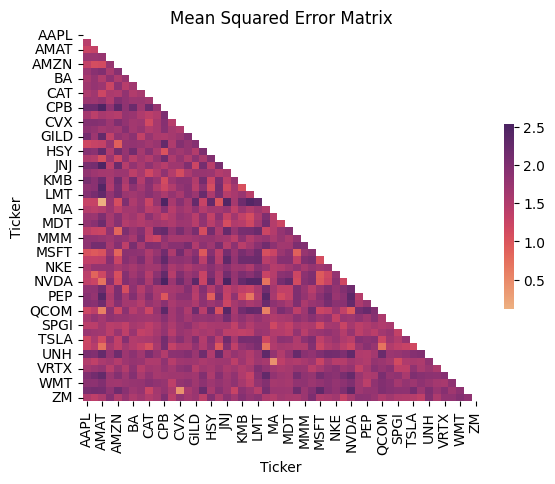

In [60]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cmap='flare', cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

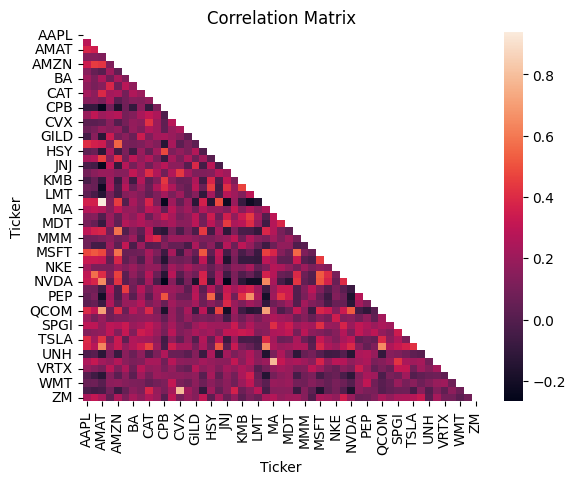

In [61]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [62]:
# Clustering
# The aggregate dataframe represents the last day of the df dataframe

aggregate = df.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate.head()

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,0.017132,0.228524,0.224077
ADBE,-0.077197,0.043393,-0.071055
AMAT,-0.058354,-0.015308,0.042340
AMGN,-0.018459,0.088599,0.123597
AMZN,0.022706,-0.003876,0.071554


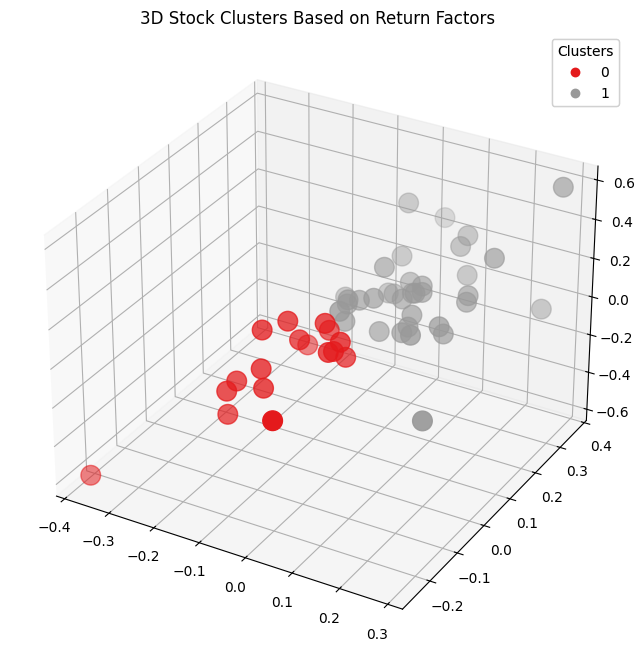

In [66]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 2 # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()